# Week 7
## Linear regression.
  
  
Ayal Gussow, 03/15/2018

# Let's have a look at *Ames* housing prices

In [1]:
import pandas as pd

ames = pd.read_table("preprocessed_ames.csv", sep=",")
ames.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,CentralAir,Id,LotFrontage,SaleCondition,SalePrice,missing_second_floor,total_sf,normalized_total_sf,CentralAir_bool
0,0,856,854.0,Y,1,65.0,normal,208500,False,1710.0,0.681956,True
1,1,1262,0.0,Y,2,80.0,normal,181500,False,1262.0,-0.362473,True
2,2,920,866.0,Y,3,68.0,normal,223500,False,1786.0,0.859135,True
3,3,961,756.0,Y,4,60.0,abnormal,140000,False,1717.0,0.698275,True
4,4,1145,1053.0,Y,5,84.0,normal,250000,False,2198.0,1.819637,True


# Let's start

In [3]:
from sklearn.model_selection import train_test_split

# Focus on features, outcome
X = ames[["LotFrontage", "total_sf"]]
y = ames.SalePrice

#X.head()
#y.head()

# Let's divide this data into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=213
)

X_train
X_test
y_train
y_test

37    153000
40    160000
0     208500
33    165500
17     90000
34    277500
21    139400
44    141000
30     40000
24    154000
Name: SalePrice, dtype: int64

# Sklearn makes life easy

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

#print(X_train.head())
lr = LinearRegression()
lr.fit(X_train, y_train) # train
print(lr.intercept_, lr.coef_)
preds = lr.predict(X_test) #predict

# Assessments
print(preds)
print("\n".join(["{}\t{}\t{}".format(pred, truth, round(abs(pred-truth))) for pred, truth in zip(preds, y_test)]))

-45958.8156414 [ 884.40517516  116.26475214]
[ 170282.55084091  182265.75090014  210340.24689683  213599.62525124
  168397.47573846  188594.77295274  133273.6247095   177173.60802377
  151382.12167991  142378.69727861]
170282.55084090805	153000	17283.0
182265.750900142	160000	22266.0
210340.2468968307	208500	1840.0
213599.62525124307	165500	48100.0
168397.4757384613	90000	78397.0
188594.77295273604	277500	88905.0
133273.62470949627	139400	6126.0
177173.60802377484	141000	36174.0
151382.1216799105	40000	111382.0
142378.69727860682	154000	11621.0


# Evaluating Metric and Coefficients

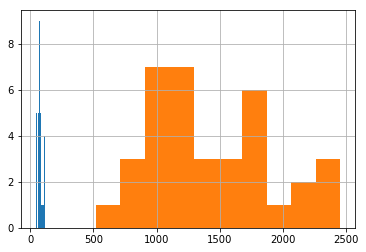

In [8]:
# Let's get the RMSE
#print(np.sqrt(mean_squared_error(preds, y_test)))

#plt.scatter(y_test, preds)

#print(lr.coef_)
X_train.columns
X_train.LotFrontage.hist()
X_train.total_sf.hist()

# Preprocessing?

In [21]:
from sklearn import preprocessing

#standard_scaler = preprocessing.StandardScaler()
#scaler = standard_scaler.fit(X_train)
#print(scaler.mean_)
#print(X_train.mean())

#print(scaler.var_)
#print(X_train.var(ddof=0))
scaled_features = scaler.transform(X_train)
X_train_nrm = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
#print(X_train_nrm.mean())
#print(X_train_nrm.var(ddof=0))

lr_nrm = LinearRegression()

# Train the model
lr_nrm.fit(X_train_nrm, y_train)

# Test the model
X_test_nrm = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index, columns=X_test.columns
)

#print(X_test_nrm.mean(), "X_test mean")
preds_nrm = lr_nrm.predict(X_test_nrm)
print(lr.coef_)
print(lr_nrm.coef_)

#np.isclose(preds, preds_nrm)
print(preds)
print(preds_nrm)

[ 884.40517516  116.26475214]
[ 16067.84756897  54808.49074935]
[ 170282.55084091  182265.75090014  210340.24689683  213599.62525124
  168397.47573846  188594.77295274  133273.6247095   177173.60802377
  151382.12167991  142378.69727861]
[ 170282.55084091  182265.75090014  210340.24689683  213599.62525124
  168397.47573846  188594.77295274  133273.6247095   177173.60802377
  151382.12167991  142378.69727861]


# Manually, in numpy

In [25]:
n, m = X_train.shape

# Add an "intercept" term for beta_0
intercept_x = np.hstack((np.ones((n,1)), X_train))
#print(intercept_x)

solution, sum_of_square_residuals, rank, singvals = np.linalg.lstsq(intercept_x, y_train)
print(solution)
print(lr.intercept_, lr.coef_)

preds_man = solution[0] * 1 + solution[1] * X_test.iloc[:, 0] + solution[2] * X_test.iloc[:, 1]
np.isclose(preds, preds_man)

[-45958.81564144    884.40517516    116.26475214]
-45958.8156414 [ 884.40517516  116.26475214]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

$ y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2$

# Some Notes
* Gradient Descent (stochastic)
* "Linear" in linear model: linear combination of input, weights, i.e. $y = \beta X$
* Overcomplex models (m>>n) tend to overfit
* Some forms of linear regression penalize for complexity
* **Categorical Variables**: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

# Some notes on model complexity
* Very simple models **underfit**, leads to high **bias**
* Very complex models **overfit**, leads to high **variance**
* The goal is to differentiate the **signal** from the **noise**
* (Highly recommended book on predictions: http://amzn.to/2DuydQ2)

# How to try and overcome these issues
* **Never train and evaluate on the same set!**
* We measure the performance of our model on the test set.
* Validation curves (http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) 

# Most important
* Guiding questions: What are the data saying?